In [1]:
import opacities as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
cond=op.conductivity("./../new_cons/Normal_silicates/")

<IPython.core.display.Javascript object>


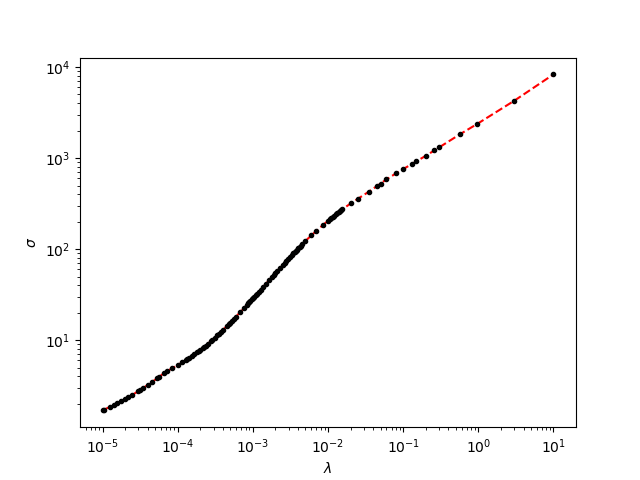

In [3]:
plt.figure()
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma$")
plt.loglog(cond.lambdas,np.abs(cond.conductivities),'r--')
plt.loglog(cond.lambdas,np.abs(cond.conductivities),'k.')

In [4]:
def mrn_pollack(r):
    P0=0.005e-4
    if(r>=5e-4):
        return 0.
    if(r<5e-4):
        if(r>=1e-4):
            return (1/P0)**2*(P0/r)**5.5
        if(r<1e-4):
            if(r>=P0):
                return (P0/r)**3.5
            if(r<P0):
                return 1.
            
def sizes_distr(smin,smax,ndust):
    sdust = np.zeros(ndust)
    sdb=np.logspace(np.log10(smin),np.log10(smax),ndust+1)
    for i in range(ndust):
        sdust[i]=np.sqrt(sdb[i]*sdb[i+1])
    return [sdust,sdb]

ndust=500 #number of dust species
smin =2.5e-7 # Min grain size
smax=5e-4 # Max grain size

epsilon_0=0.013986 #Dust-to-gas ratio from Semenov
sdust,sdb=sizes_distr(smin,smax,ndust) 

rho_n=np.zeros(ndust)  
for j in range(0,ndust):
    rho_n[j]=mrn_pollack(sdust[j])

In [5]:
dist=op.dustDistribution(sdust,rho_n)

In [6]:
opacities=op.opacity(length=113)

In [7]:
opacities.data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
opacities.calculate_opacity(grainProperties=cond, dustDistribution=dist)

In [9]:
opacities.data

array([3.56673275e+09, 3.24275612e+09, 2.26688465e+09, 1.79911511e+09,
       1.46377425e+09, 1.14639119e+09, 8.77995456e+08, 7.26737716e+08,
       5.64862396e+08, 3.95736824e+08, 3.54594714e+08, 2.93906540e+08,
       2.27781590e+08, 1.82334152e+08, 1.34541405e+08, 1.17696372e+08,
       9.39748717e+07, 7.48484407e+07, 5.46883929e+07, 3.88374941e+07,
       2.91326834e+07, 2.27681067e+07, 2.10887080e+07, 1.95847700e+07,
       1.63405530e+07, 1.40093941e+07, 1.17407794e+07, 1.05271640e+07,
       9.49730192e+06, 8.22186312e+06, 7.38471777e+06, 6.89879892e+06,
       6.11373480e+06, 5.08552579e+06, 4.59482763e+06, 4.04955100e+06,
       3.50206535e+06, 3.22839381e+06, 2.84308022e+06, 2.52795039e+06,
       2.03065585e+06, 1.82646131e+06, 1.70078978e+06, 1.53778297e+06,
       1.39955322e+06, 1.28132128e+06, 1.02574743e+06, 8.57494040e+05,
       7.46955698e+05, 6.88756657e+05, 6.54414580e+05, 6.23150003e+05,
       5.81299624e+05, 5.60397373e+05, 5.23126960e+05, 4.91050565e+05,
      

<IPython.core.display.Javascript object>


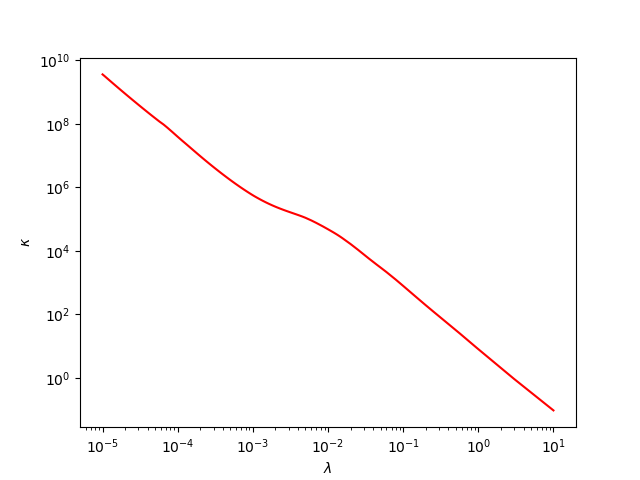

In [10]:
plt.figure()
plt.xlabel("$\lambda$")
plt.ylabel("$\kappa$")
plt.loglog(cond.lambdas,opacities.data,'r')
